<a href="https://colab.research.google.com/github/Ramyrahmeni/DeepLearning/blob/main/TP_batchnorm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
# Load data set
mnist = datasets.mnist

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


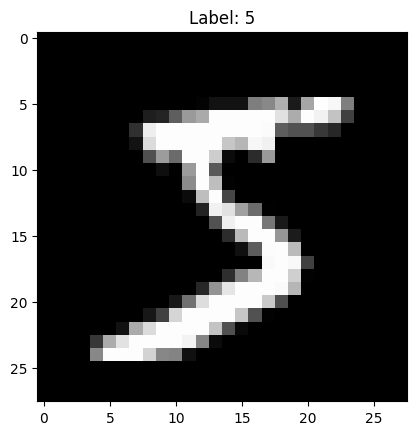

In [ ]:

import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

plt.imshow(train_images[0], cmap='gray')
plt.title(f'Label: {train_labels[0]}')
plt.show()


In [ ]:
mnist = datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(512, activation=tf.nn.relu))
model.add(layers.Dense(10, activation=tf.nn.softmax))
model.compile(optimizer="adam",
 loss="sparse_categorical_crossentropy",
 metrics=["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.9007 - loss: 0.3397
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9753 - loss: 0.0818
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9843 - loss: 0.0492
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9881 - loss: 0.0358
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9928 - loss: 0.0231
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9750 - loss: 0.0819


[0.06795815378427505, 0.9793000221252441]

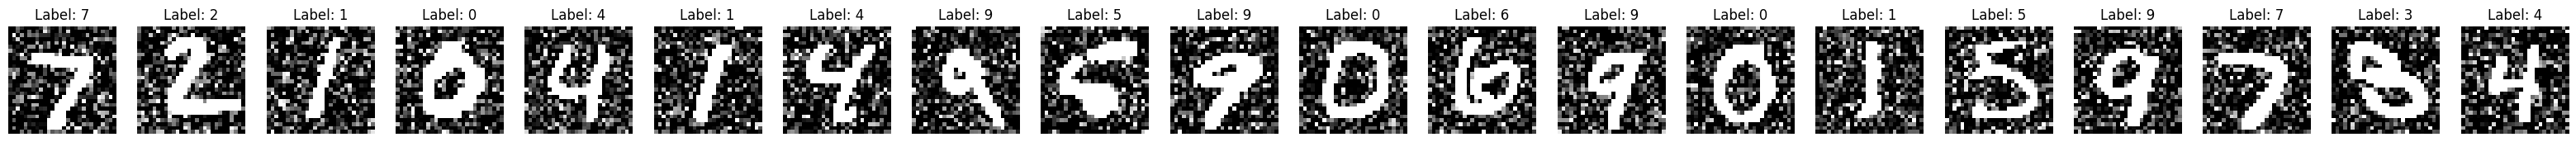

313/313 - 1s - 2ms/step - accuracy: 0.6320 - loss: 1.6054

Test accuracy on noisy images: 0.63


In [ ]:
import numpy as np
def add_noise(images, noise_factor=0.5):
    noise = noise_factor * np.random.randn(*images.shape)
    noisy_images = images + noise
    noisy_images = np.clip(noisy_images, 0., 1.)
    return noisy_images

noisy_test_images = add_noise(test_images, noise_factor=0.5)

n = 20
plt.figure(figsize=(40, 2))
for i in range(n):
    plt.subplot(1, n, i + 1)
    plt.imshow(noisy_test_images[i], cmap='gray')
    plt.title(f"Label: {test_labels[i]}")
    plt.axis('off')
plt.show()

test_loss, test_acc = model.evaluate(noisy_test_images, test_labels, verbose=2)
print(f'\nTest accuracy on noisy images: {test_acc:.2f}')